In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata


from matplotlib.patches import Patch
import pickle
import pandas as pd
import networkx as nx

pd.set_option('display.max_rows', None)

In [2]:
with open('graph_objects/G_multi_directed_iggielgn.pickle', 'rb') as f:
    G_multi_directed = pickle.load(f)
    G_multi_directed.name = 'G_multi_directed'

In [3]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'

In [4]:
# print the min and max value of the max_cap_M_m3_per_d attribute of the edges in G_simple_directed
# Initialize an empty list to store the max_cap_M_m3_per_d values
max_cap_values = []

# Iterate through the edges to collect the max_cap_M_m3_per_d values
for u, v, data in G_multi_directed.edges(data=True):
    max_cap_values.append(data['max_cap_M_m3_per_d'])

# Extract the min and max values from the list
min_value = min(max_cap_values)
max_value = max(max_cap_values)
mode_value = max(set(max_cap_values), key=max_cap_values.count)

print("Minimum max_cap_M_m3_per_d:", min_value)
print("Maximum max_cap_M_m3_per_d:", max_value)
print("Mode max_cap_M_m3_per_d:", mode_value)

Minimum max_cap_M_m3_per_d: 2.0
Maximum max_cap_M_m3_per_d: 200.0
Mode max_cap_M_m3_per_d: 27.809143341935314


# Topology clustering analysis

In [5]:
# Find the clustering coefficient of the graph G_simple_directed
clustering_coefficient = round(nx.average_clustering(G_simple_directed),4)

# Find the average degree of the graph G_simple_directed
degree = round(sum(dict(G_simple_directed.degree()).values()) / len(G_simple_directed), 2)

# Find the median degree of the graph G_simple_directed
median_degree = round(pd.Series(dict(G_simple_directed.degree()).values()).median(), 2)


print('clustering_coefficient:', clustering_coefficient)
print('degree:', degree)

print()
# Define the list of central and western European country codes
central_european_country_codes = ['DE', 'BE', 'NL']

# Extract the nodes that belong to central European countries
central_european_nodes = [node for node, attr in G_simple_directed.nodes(data=True) if attr.get('country_code') in central_european_country_codes]

# Create the subgraph
G_central_european = G_simple_directed.subgraph(central_european_nodes)

# Find the clustering coefficient of the graph G_central_european
clustering_coefficient_central_european = round(nx.average_clustering(G_central_european),4)

# Find the average degree of the graph G_central_european
degree_central_european = round(sum(dict(G_central_european.degree()).values()) / len(G_central_european), 2)

# Find the median degree of the graph G_central_european
median_degree_central_european = round(pd.Series(dict(G_central_european.degree()).values()).median(), 2)

print('clustering_coefficient_central_european:', clustering_coefficient_central_european)
print('degree_central_european:', degree_central_european)


clustering_coefficient: 0.0191
degree: 2.57

clustering_coefficient_central_european: 0.0254
degree_central_european: 2.89


# Visualization of Graph Representations

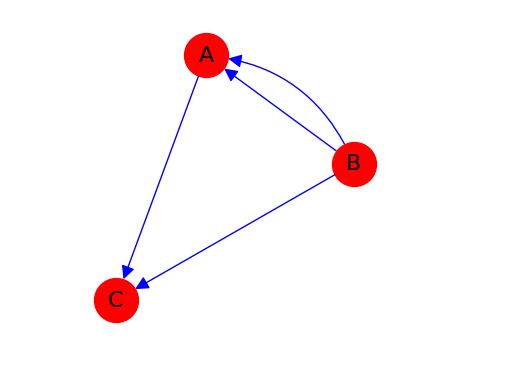

In [6]:
G=nx.MultiDiGraph([(1,2),(1,2),(3,1),(3,2)])

pos = nx.random_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 1000, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="b",
                                shrinkA=16, shrinkB=16,
                                patchA=None, patchB=None,
                                mutation_scale=20,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
# Define node labels
labels = {1: 'A', 2: 'B', 3: 'C'}

# Draw the labels
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.axis('off')
plt.show()

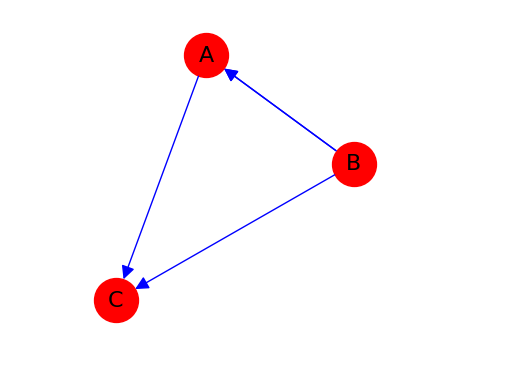

In [7]:
G=nx.MultiDiGraph([(1,2),(1,2),(3,1),(3,2)])

pos = nx.random_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 1000, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="b",
                                shrinkA=16, shrinkB=16,
                                mutation_scale=20,
                                patchA=None, patchB=None,
                               
                                ),
                )
# Define node labels
labels = {1: 'A', 2: 'B', 3: 'C'}

# Draw the labels
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.axis('off')
plt.show()

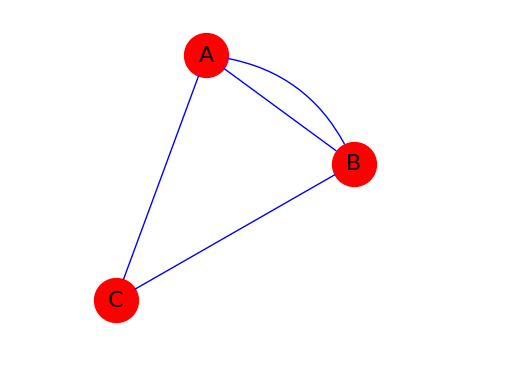

In [8]:
# Create a MultiGraph
G = nx.MultiGraph([(1, 2), (1, 2), (3, 1), (3, 2)])

# Define positions for the nodes
pos = nx.random_layout(G, seed=42)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='r', node_size=1000, alpha=1)

# Draw the edges with arc
for e in G.edges:
    ax = plt.gca()
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", color="b",
                                shrinkA=16, shrinkB=16,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr', str(0.3 * e[2]))
                                ))

# Define node labels
labels = {1: 'A', 2: 'B', 3: 'C'}

# Draw the labels
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.axis('off')
plt.show()


# Exemplification of Max Flow Problem Definitions

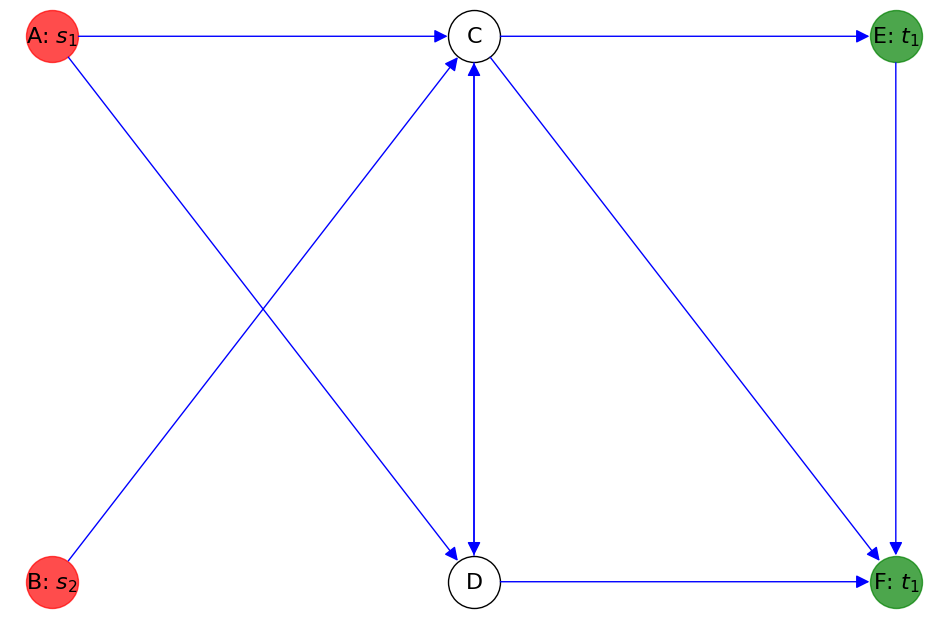

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new MultiDiGraph and add nodes
G = nx.MultiDiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Define positions for nodes in a lattice
pos = {
    1: (0, 1),  # A
    2: (0, 0),  # B
    3: (1, 1),  # C
    4: (1, 0),  # D
    5: (2, 1),  # E
    6: (2, 0),  # F
}

# Add specified edges in the correct direction
edges = [(1, 3), (1, 4), (2, 3), (3, 6), (3, 5), (4, 6), (3, 4), (4, 3), (5, 6)]
G.add_edges_from(edges)

sink_color = 'green'
source_color = 'red'
regular_color = 'white'

# Draw sinks
nx.draw_networkx_nodes(G, pos, nodelist=[1, 2], node_color=source_color, node_size=1400, alpha=0.7)

# Draw sources
nx.draw_networkx_nodes(G, pos, nodelist=[5, 6], node_color=sink_color, node_size=1400, alpha=0.7)

# Draw regular nodes
nx.draw_networkx_nodes(G, pos, nodelist=[3, 4], node_color=regular_color, edgecolors='black', node_size=1400, alpha=1)

# Draw edges with custom styling
ax = plt.gca()
for e in G.edges:
    style = "solid"
    ax.annotate("",
                xy=pos[e[1]], xycoords='data',
                xytext=pos[e[0]], textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="b",
                                linestyle=style,
                                shrinkA=19, shrinkB=19,
                                patchA=None, patchB=None,
                                mutation_scale=20,
                                connectionstyle="arc3,rad=0.0",
                                ),
                )

# Define node labels
labels = {1: 'A: $s_1$', 2: 'B: $s_2$', 3: 'C', 4: 'D', 5: 'E: $t_1$', 6: 'F: $t_1$'}
nx.draw_networkx_labels(G, pos, labels, font_size=16)

# Adjust the figure size and margins
plt.subplots_adjust(left=-0.5, right=0.95, top=1.3, bottom=0.05)
plt.axis('off')
plt.show()


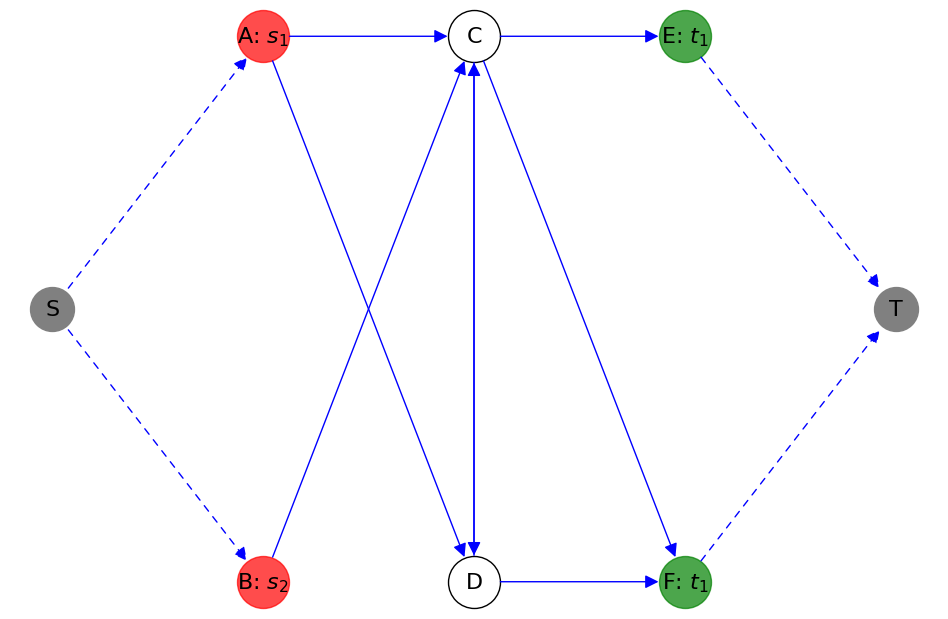

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new MultiDiGraph and add nodes
G = nx.MultiDiGraph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7])

# Define positions for nodes in a lattice
pos = {
    0: (-1, 0.5),  # super source
    1: (0, 1),  # A
    2: (0, 0),  # B
    3: (1, 1),  # C
    4: (1, 0),  # D
    5: (2, 1),  # E
    6: (2, 0),   # F
    7: (3, 0.5)   # super sink
}

# Add specified edges in the correct direction
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 3), (3, 6), (3, 5), (4, 6), (3, 4), (4, 3), (5, 7), (6, 7)]
G.add_edges_from(edges)

sink_color = 'green'
source_color = 'red'
regular_color = 'white'
super_color = 'gray'

# Draw sinks
nx.draw_networkx_nodes(G, pos, nodelist=[1, 2], node_color=source_color, node_size=1400, alpha=0.7)

# Draw sources
nx.draw_networkx_nodes(G, pos, nodelist=[5, 6], node_color=sink_color, node_size=1400, alpha=0.7)

# Draw regular nodes
nx.draw_networkx_nodes(G, pos, nodelist=[3, 4], node_color=regular_color, edgecolors='black', node_size=1400, alpha=1)

# Draw super source and sink
nx.draw_networkx_nodes(G, pos, nodelist=[0, 7], node_color=super_color, node_size=1000, alpha=1)

# Draw edges with custom styling
ax = plt.gca()
for e in G.edges:
    style = "dashed" if e[0] == 0 or e[1] == 7 else "solid"
    # Increase the spacing between the dashed lines
    if style == "dashed":
        style = (0, (5, 5))
    ax.annotate("",
                xy=pos[e[1]], xycoords='data',
                xytext=pos[e[0]], textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="b",
                                linestyle=style,
                                shrinkA=19, shrinkB=19,
                                patchA=None, patchB=None,
                                mutation_scale=20,
                                connectionstyle="arc3,rad=0.0",
                                ),
                )

# Define node labels
labels = {0: 'S', 1: 'A: $s_1$', 2: 'B: $s_2$', 3: 'C', 4: 'D', 5: 'E: $t_1$', 6: 'F: $t_1$', 7: 'T'}
nx.draw_networkx_labels(G, pos, labels, font_size=16)

# Adjust the figure size and margins
plt.subplots_adjust(left=-0.5, right=0.95, top=1.3, bottom=0.05)
plt.axis('off')
plt.show()


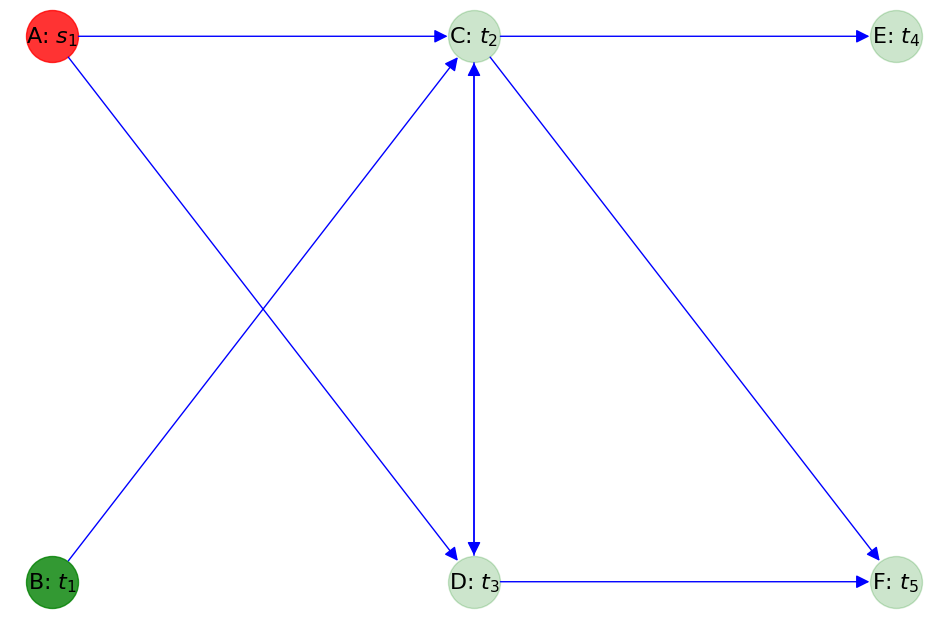

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new MultiDiGraph and add nodes
G = nx.MultiDiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Define positions for nodes in a lattice
pos = {
    1: (0, 1),  # A
    2: (0, 0),  # B
    3: (1, 1),  # C
    4: (1, 0),  # D
    5: (2, 1),  # E
    6: (2, 0)   # F
}

# Add specified edges in the correct direction
edges = [(1, 3), (1, 4), (2, 3), (3, 6), (3, 5), (4, 6), (3, 4), (4, 3)]
G.add_edges_from(edges)

sink_color = 'green'
source_color = 'red'
regular_color = 'red'
super_color = 'gray'

# Draw sinks
nx.draw_networkx_nodes(G, pos, nodelist=[1], node_color=source_color, node_size=1400, alpha=0.8)

# Draw sources
nx.draw_networkx_nodes(G, pos, nodelist=[2], node_color=sink_color, node_size=1400, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=[3,4,5,6], node_color=sink_color, node_size=1400, alpha=0.2)



# Draw edges with custom styling
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[1]], xycoords='data',
                xytext=pos[e[0]], textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="b",
                                shrinkA=19, shrinkB=19,
                                patchA=None, patchB=None,
                                mutation_scale=20,
                                connectionstyle="arc3,rad=0.0",
                                ),
                )

# Define node labels
labels = {1: 'A: $s_1$', 2: 'B: $t_1$', 3: 'C: $t_2$', 4: 'D: $t_3$', 5: 'E: $t_4$', 6: 'F: $t_5$'}
nx.draw_networkx_labels(G, pos, labels, font_size=16)

# Adjust the figure size and margins
plt.subplots_adjust(left=-0.5, right=0.95, top=1.3, bottom=0.05)
plt.axis('off')
plt.show()


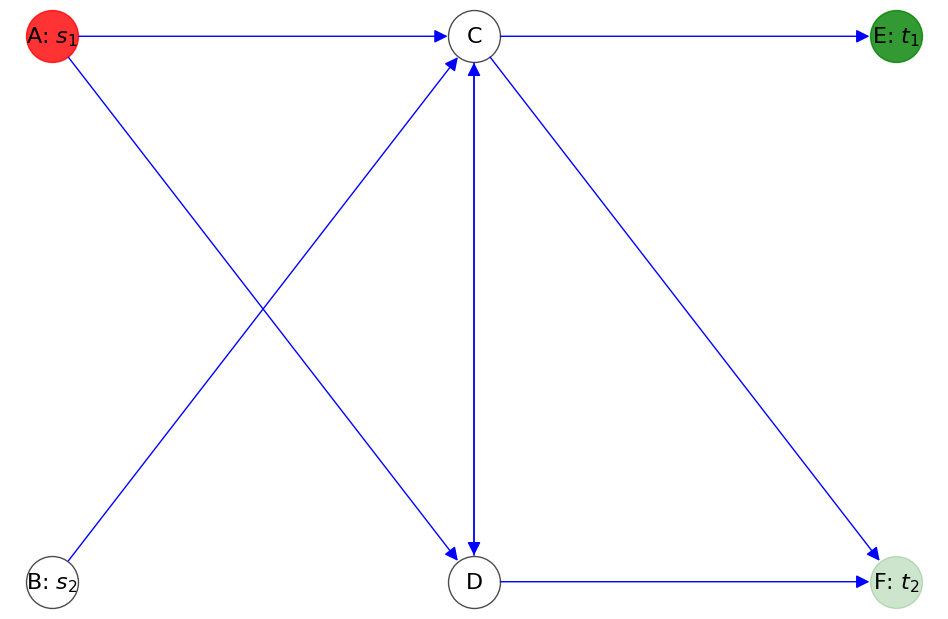

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new MultiDiGraph and add nodes
G = nx.MultiDiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Define positions for nodes in a lattice
pos = {
    1: (0, 1),  # A
    2: (0, 0),  # B
    3: (1, 1),  # C
    4: (1, 0),  # D
    5: (2, 1),  # E
    6: (2, 0)   # F
}

# Add specified edges in the correct direction
edges = [(1, 3), (1, 4), (2, 3), (3, 6), (3, 5), (4, 6), (3, 4), (4, 3)]
G.add_edges_from(edges)

source_color = 'red'
sink_color = 'green'
regular_color = 'white'

# Draw sinks
nx.draw_networkx_nodes(G, pos, nodelist=[1], node_color=source_color, node_size=1400, alpha=0.8)

# Draw sources
nx.draw_networkx_nodes(G, pos, nodelist=[5], node_color=sink_color, node_size=1400, alpha=0.8)

nx.draw_networkx_nodes(G, pos, nodelist=[6], node_color=sink_color, node_size=1400, alpha=0.2)



# Draw regular nodes
nx.draw_networkx_nodes(G, pos, nodelist=[2, 3, 4], node_color=regular_color, edgecolors='black', node_size=1400, alpha=0.7)

# Draw edges with custom styling
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[1]], xycoords='data',
                xytext=pos[e[0]], textcoords='data',
                arrowprops=dict(arrowstyle="-|>", color="b",
                                shrinkA=19, shrinkB=19,
                                patchA=None, patchB=None,
                                mutation_scale=20,
                                connectionstyle="arc3,rad=0.0",
                                ),
                )

# Define node labels
labels = {1: 'A: $s_1$', 2: 'B: $s_2$', 3: 'C', 4: 'D', 5: 'E: $t_1$', 6: 'F: $t_2$'}
nx.draw_networkx_labels(G, pos, labels, font_size=16)

# Adjust the figure size and margins
plt.subplots_adjust(left=-0.5, right=0.95, top=1.3, bottom=0.05)
plt.axis('off')
plt.show()


# Node

In [13]:
#analysis = 'centrality'
analysis = 'max_flow'

In [14]:
results_df = pd.DataFrame()

if analysis == 'centrality': 
    results_df = pd.read_pickle('results/centrality/iggielgn/greedy_node_removal.pkl')
    results_df['diff'] = round(results_df['NPI'].diff() * (-1), 5) 
    results_df = results_df.iloc[1:101]
    results_df.NPI = round(results_df.NPI, 3)
    results_df.connectedness = round(results_df.connectedness, 3)
    results_df.reach = round(results_df.reach, 3)
    results_df.connectivity = round(results_df.connectivity, 3)
    results_df['CC'] = ''
    results_df['type'] = ''
    results_df['flow_type'] = ''
    results_df = results_df[['removed_entity', 'CC', 'type', 'flow_type', 'NPI', 'connectedness', 'reach', 'connectivity', 'diff']]

if analysis == 'max_flow':
    results_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/WFCR_node_removal_df.pkl')
    results_df['diff'] = round(results_df['capacity_robustness_max_flow'].diff() * (-1), 5) 
    results_df.capacity_robustness_max_flow = round(results_df.capacity_robustness_max_flow, 3)
    results_df['CC'] = ''
    results_df['type'] = ''
    results_df['flow_type'] = ''
    results_df = results_df[['removed_entity', 'CC', 'type', 'flow_type', 'capacity_robustness_max_flow', 'diff']].iloc[1:]


In [15]:
# Iterate through the nodes in G_multi_directed_iggielgn and assign a type to each node 
for node in G_multi_directed.nodes():
    results_df.loc[results_df['removed_entity'] == node, 'type'] = G_multi_directed.nodes[node]['type']
    results_df.loc[results_df['removed_entity'] == node, 'flow_type'] = G_multi_directed.nodes[node]['flow_type']
    results_df.loc[results_df['removed_entity'] == node, 'CC'] = [G_multi_directed.nodes[node]['country_code']]

results_df['type'] = list(results_df['type'])
results_df['type'] = results_df['type'].apply(lambda x: str([x]))
results_df['type'] = results_df['type'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", ''))
results_df['type'] = results_df['type'].apply(lambda x: x.split(', '))
results_df

# Modify each entry in type such that, if it countains 'node' as well as some other type, the 'node' is removed

for i in range(1,len(results_df)+1):
    if 'node' in results_df['type'][i] and len(results_df['type'][i]) > 1:
        results_df['type'][i].remove('node')

table_to_print = pd.DataFrame()
if analysis == 'max_flow':
    table_to_print = results_df.copy()[['removed_entity', 'CC', 'flow_type', 'capacity_robustness_max_flow']]
    table_to_print = table_to_print.rename(columns={'capacity_robustness_max_flow': 'FCR'})

else:
    table_to_print = results_df.copy()[['removed_entity', 'CC', 'flow_type', 'NPI']]

table_to_print = table_to_print.rename(columns={'flow_type': 'type'})

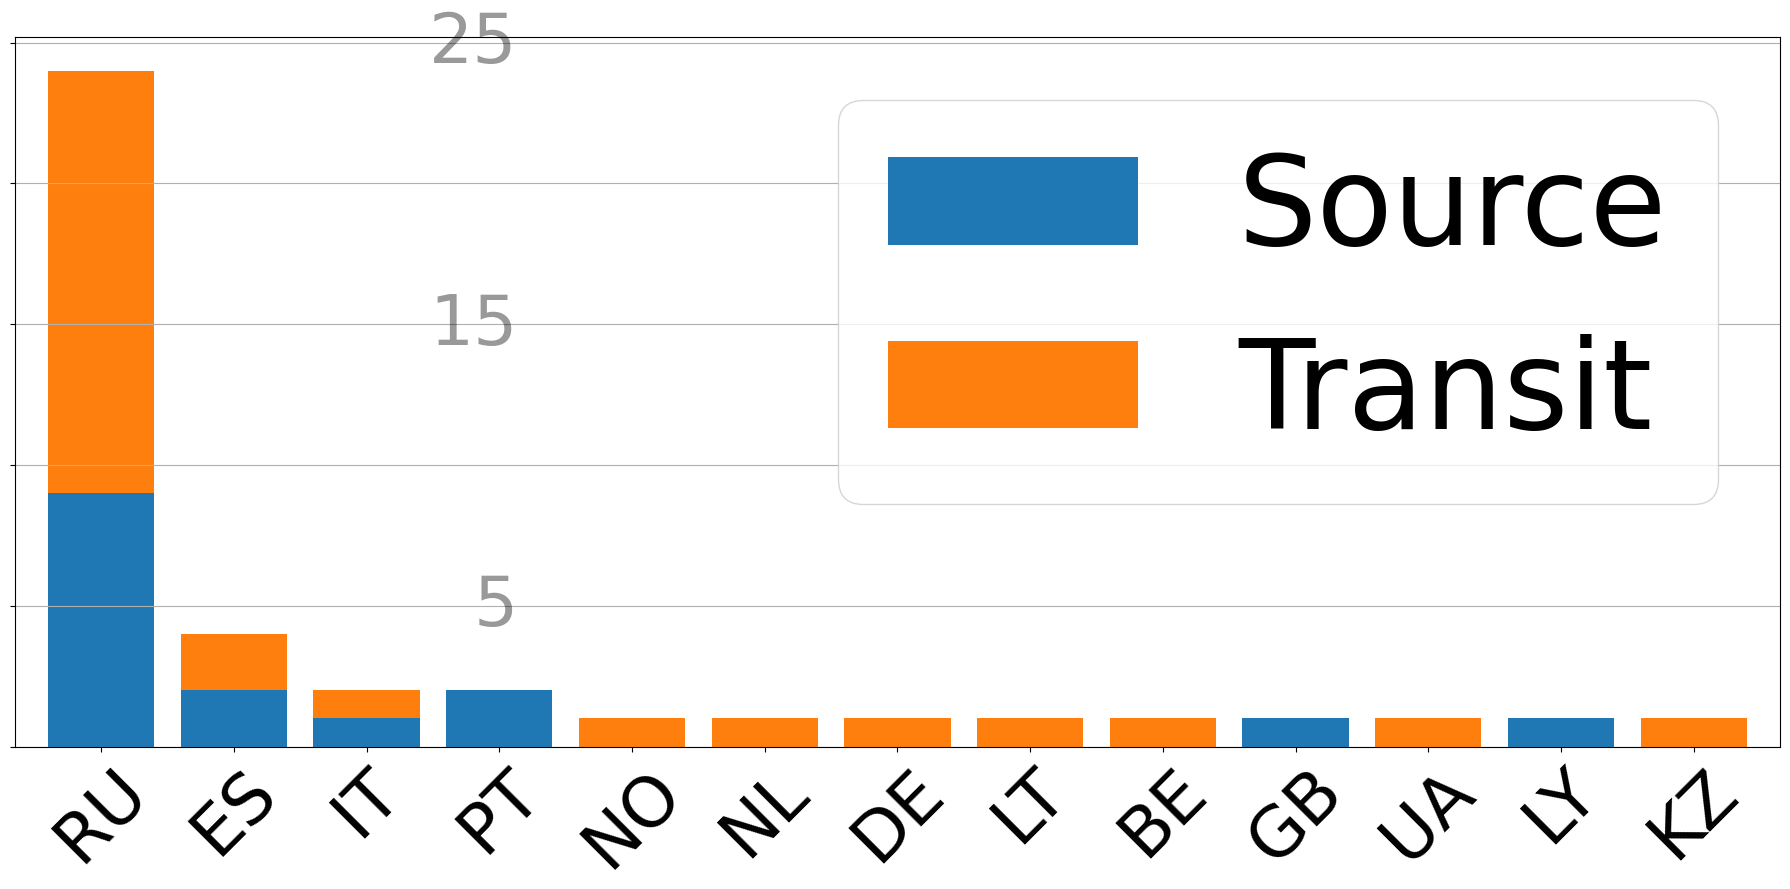

In [16]:
# Your code before modification
df_exploded = results_df.explode('type')
grouped = df_exploded.groupby(['CC', 'flow_type']).size().unstack(fill_value=0)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(18, 9))

# Calculate total number of entities for each country
country_totals = df_exploded['CC'].value_counts()
sorted_countries = country_totals.sort_values(ascending=False).index
grouped_sorted = grouped.reindex(sorted_countries)

default_colors = [plt.cm.tab10(i) for i in range(10)]  # Get the first 10 default Tableau colors

# Specify colors for each type
colors = {type_: default_colors[i] for i, type_ in enumerate(grouped_sorted.columns)}
colors['node'] = 'blue'  # Assign blue color to 'node' type

grouped_sorted.plot(kind='bar', stacked=True, ax=ax, width=0.8, color=[colors[type_] for type_ in grouped_sorted.columns])  

# Your code after modification
country_counts = results_df['CC'].value_counts()

ax.set_xlabel('')

# Add legend to the subplots
handles1, labels1 = ax.get_legend_handles_labels()
labels1 = [label.capitalize() for label in labels1]
ax.legend(handles1, labels1, loc='upper right', fontsize=90)

# Set x-axis ticks and labels
ax.set_xticks(range(len(sorted_countries)))
ax.set_xticklabels(sorted_countries, rotation=45, fontsize=50, fontweight='ultralight')

# Remove the y-axis labels
ax.set_yticklabels([])

# Add grid lines
ax.grid(axis='y')
for line in ax.yaxis.get_gridlines():
    y = line.get_ydata()[0]  # Get the y-value of the grid line
    if y in [5, 15, 25]:
        ax.annotate(f'{y:.0f}', xy=(0, y), xytext=(300, 0), textcoords='offset points', ha='right', va='center', fontsize=50, alpha=0.4)

plt.tight_layout()
plt.savefig('saved_plots/specific/helpers/'+analysis+'_country_node_aggr.png', bbox_inches='tight', pad_inches=0.1)


In [17]:
df_exploded.value_counts('flow_type')

flow_type
transit    25
source     16
Name: count, dtype: int64

C:\Users\Oskar\AppData\Local\Temp\ipykernel_15016\2831522571.py:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(row['CC'], (row['Component_Count'], row['Cumulative_' + metric + '_Damage']), fontsize=20, textcoords='offset points')


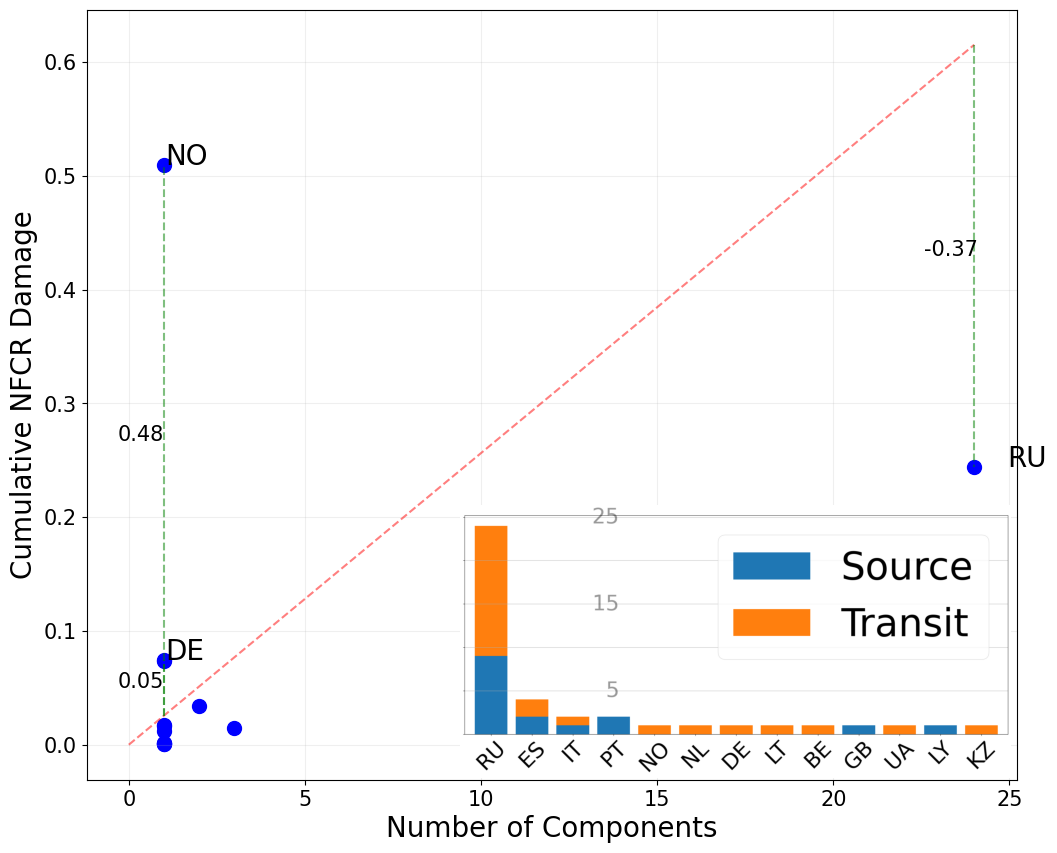

In [18]:
aggregated_data = results_df.groupby('CC').agg({'removed_entity': 'count', 'diff': 'sum'}).reset_index()
metric = 'NCPI' if analysis == 'centrality' else 'NFCR'
aggregated_data.columns = ['CC', 'Component_Count', 'Cumulative_' + metric + '_Damage']     


# plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 10))
plt.scatter(aggregated_data['Component_Count'], aggregated_data['Cumulative_' + metric + '_Damage'], s=100, c='blue')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Cumulative '+metric+' Damage', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.2)


# Add a label and an arrow to the point for the top 3 countries with the highest cumulative NPI damage
top_3 = aggregated_data.nlargest(3, 'Cumulative_' + metric + '_Damage')
for i, row in top_3.iterrows():
    plt.annotate(row['CC'], (row['Component_Count'], row['Cumulative_' + metric + '_Damage']), fontsize=20, textcoords='offset points')

  
slope = 1 / aggregated_data['Component_Count'].sum()

# Extend the line to the end of the plot
max_x = aggregated_data['Component_Count'].max()
max_y = slope * max_x
plt.plot([0, max_x], [0, max_y], 'r--', alpha=0.5, label='Regression Line')

for i, row in top_3.iterrows():
    x, y1, y2 = row['Component_Count'], row['Component_Count'] * slope, row['Cumulative_' + metric + '_Damage']
    
    # Plot the dashed line
    plt.plot([x, x], [y1, y2], 'g--', alpha=0.5)

    plt.annotate(round(row['Cumulative_' + metric + '_Damage'] - row['Component_Count'] * slope, 2), 
                 (x, (y1 + y2) / 2), 
                 textcoords="offset points", 
                 xytext=(-17,0), 
                 ha='center', 
                 fontsize=15)

if analysis == 'max_flow':
    ins_pos = (1080, 530) if analysis == 'max_flow' else (720, 1000)
    ins = inset_axes(plt.gca(), width=5.5, height=5.5, bbox_to_anchor=ins_pos)
    img = mpimg.imread('saved_plots/specific/helpers/'+analysis+'_country_node_aggr.png')
    ins.imshow(img)
    ins.axis('off')
plt.savefig('saved_plots/specific/'+analysis+'_cum_damage_versus_num_node.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('latex_figures/'+analysis+'_cum_damage_versus_num_node.svg', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Edge

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pickle
import pandas as pd

In [20]:
#analysis = 'centrality'
analysis = 'max_flow'

In [21]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'

In [22]:
results_df = pd.DataFrame()
if analysis == 'centrality':
    results_df = pd.read_pickle('results/centrality/iggielgn/greedy_edge_removal.pkl')
    results_df['diff'] = round(results_df['NPI'].diff() * (-1), 5)
    results_df = results_df.iloc[1:101]
    results_df['removed_entity'] = results_df['removed_entity'].apply(lambda edge: tuple(edge))
    results_df.NPI = round(results_df.NPI, 3)
    results_df.connectedness = round(results_df.connectedness, 3)
    results_df.reach = round(results_df.reach, 3)
    results_df.connectivity = round(results_df.connectivity, 3)
    results_df['CC'] = None
    results_df['diameter'] = None
    results_df['length'] = None
    results_df['capacity'] = None
    results_df = results_df[['removed_entity', 'CC', 'diameter', 'length', 'capacity', 'NPI', 'connectedness', 'reach', 'connectivity', 'diff']]

if analysis == 'max_flow':
    results_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/WFCR_edge_removal_df.pkl')
    results_df['diff'] = round(results_df['capacity_robustness_max_flow'].diff() * (-1), 5)
    results_df.capacity_robustness_max_flow = round(results_df.capacity_robustness_max_flow, 3)
    results_df['CC'] = None
    results_df['diameter'] = None
    results_df['length'] = None
    results_df['capacity'] = None
    results_df = results_df[['removed_entity', 'CC', 'diameter', 'length', 'capacity', 'capacity_robustness_max_flow', 'diff']].iloc[1:]
    results_df['removed_entity'] = results_df['removed_entity'].apply(lambda edge: tuple(edge))

In [23]:
# Iterate through the edges that are not in G_simple_directed.edges() and reverse the order of the nodes
for i in range(len(results_df)):
    if results_df['removed_entity'].iloc[i] not in G_simple_directed.edges():
        results_df['removed_entity'].iloc[i] = (results_df['removed_entity'].iloc[i][1], results_df['removed_entity'].iloc[i][0])

C:\Users\Oskar\AppData\Local\Temp\ipykernel_15016\4015169996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['removed_entity'].iloc[i] = (results_df['removed_entity'].iloc[i][1], results_df['removed_entity'].iloc[i][0])
C:\Users\Oskar\AppData\Local\Temp\ipykernel_15016\4015169996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['removed_entity'].iloc[i] = (results_df['removed_entity'].iloc[i][1], results_df['removed_entity'].iloc[i][0])
C:\Users\Oskar\AppData\Local\Temp\ipykernel_15016\4015169996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [24]:
for edge in G_simple_directed.edges(data=True):
    diameter_mm = edge[2]['diameter_mm']
    length_km = edge[2]['length_km']
    max_cap_M_m3_per_d = edge[2]['max_cap_M_m3_per_d']
    from_country_code = edge[2]['from_country_code']

    edge_data = [diameter_mm, length_km, max_cap_M_m3_per_d]

    results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'CC'] = [from_country_code]
    results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'diameter'] = [diameter_mm]
    results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'length'] = [length_km]
    results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'capacity'] = [max_cap_M_m3_per_d]

    source_type = G_simple_directed.nodes[edge[0]]['flow_type']
    sink_type = G_simple_directed.nodes[edge[1]]['flow_type']

    if source_type == 'source':
        pipe_type = 'source'
    elif sink_type == 'sink':
        pipe_type = 'sink'
    else:
        pipe_type = 'transmission'

    results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'pipe_type'] = pipe_type

results_df   

table_to_print = pd.DataFrame()
if analysis == 'max_flow':
    table_to_print = results_df.copy()[['removed_entity', 'CC', 'diameter', 'length', 'capacity', 'capacity_robustness_max_flow', 'pipe_type']]
    table_to_print = table_to_print.rename(columns={'capacity_robustness_max_flow': 'FCR'})

else:
    table_to_print = results_df.copy()[['removed_entity', 'CC', 'diameter', 'length', 'capacity', 'NPI']]

nan_indices = table_to_print['length'].isna()
table_to_print.loc[nan_indices, 'length'] = 0  # Replace NaN with 0
table_to_print['length'] = pd.to_numeric(table_to_print['length'], errors='coerce')
table_to_print['length'] = table_to_print['length'].round(1)

nan_indices = table_to_print['capacity'].isna()
table_to_print.loc[nan_indices, 'capacity'] = 0  # Replace NaN with 0
table_to_print['capacity'] = pd.to_numeric(table_to_print['capacity'], errors='coerce')
table_to_print['capacity'] = table_to_print['capacity'].round(1)

nan_indices = table_to_print['diameter'].isna()
table_to_print.loc[nan_indices, 'diameter'] = 0  # Replace NaN with 0
table_to_print['diameter'] = pd.to_numeric(table_to_print['diameter'], errors='coerce')
table_to_print['diameter'] = table_to_print['diameter'].astype(int)

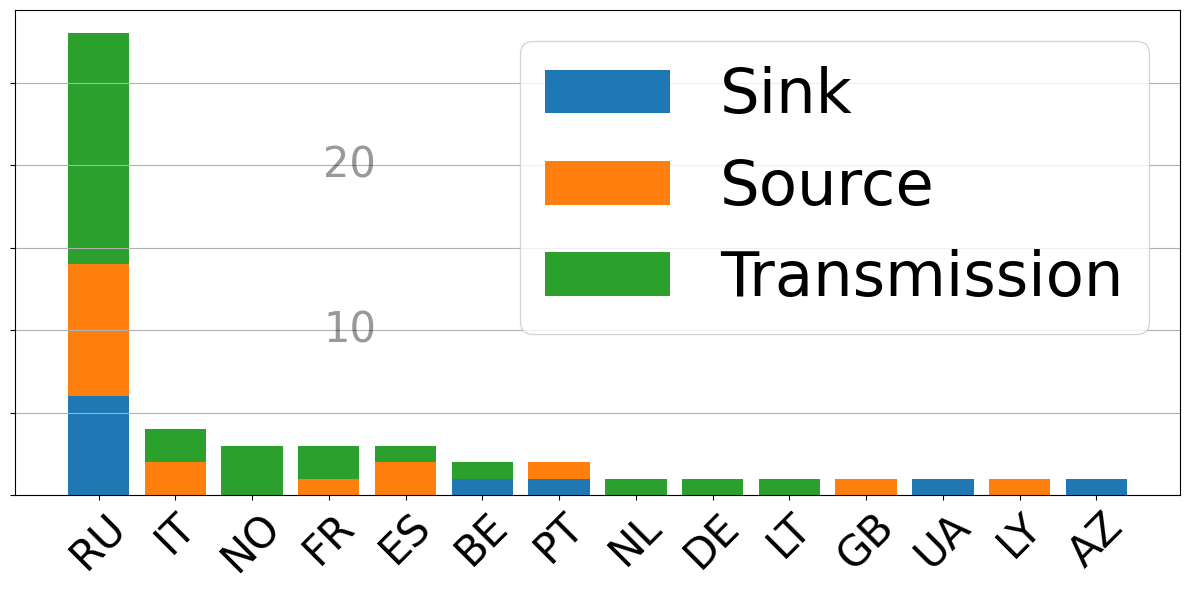

In [25]:
# Explode the DataFrame
df_exploded = results_df.explode('pipe_type')

# Group and unstack
grouped = df_exploded.groupby(['CC', 'pipe_type']).size().unstack(fill_value=0)

grouped = grouped.reindex(df_exploded['CC'].value_counts().sort_values(ascending=False).index)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(grouped))
pipe_types = grouped.columns
bottom = None

for pipe_type in pipe_types:
    bars = grouped[pipe_type]
    if bottom is None:
        ax.bar(x, bars, label=pipe_type)
        bottom = bars
    else:
        ax.bar(x, bars, bottom=bottom, label=pipe_type)
        bottom = bottom + bars
    
handles1, labels1 = ax.get_legend_handles_labels()
labels1 = [label.capitalize() for label in labels1]
ax.legend(handles1, labels1, loc='upper right', fontsize=45)

ax.set_xticks(x)
ax.set_xticklabels(grouped.index, rotation=45, fontsize=30, fontweight='ultralight')
# Remove the y-axis labels
ax.set_yticklabels([])
ax.grid(True, axis='y')
for line in ax.yaxis.get_gridlines():
    y = line.get_ydata()[0]  # Get the y-value of the grid line
    if y in [10, 20]:
        ax.annotate(f'{y:.0f}', xy=(0, y), xytext=(200, 0), textcoords='offset points', ha='right', va='center', fontsize=30, alpha=0.4)

plt.tight_layout()
plt.savefig('saved_plots/specific/helpers/'+analysis+'_country_edge_aggr.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('saved_plots/specific/helpers/'+analysis+'_country_edge_aggr.svg', bbox_inches='tight', pad_inches=0.1)


C:\Users\Oskar\AppData\Local\Temp\ipykernel_15016\2255529605.py:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(row['CC'], (row['Component_Count'], row['Cumulative_' + metric + '_Damage']), fontsize=20, textcoords='offset points')


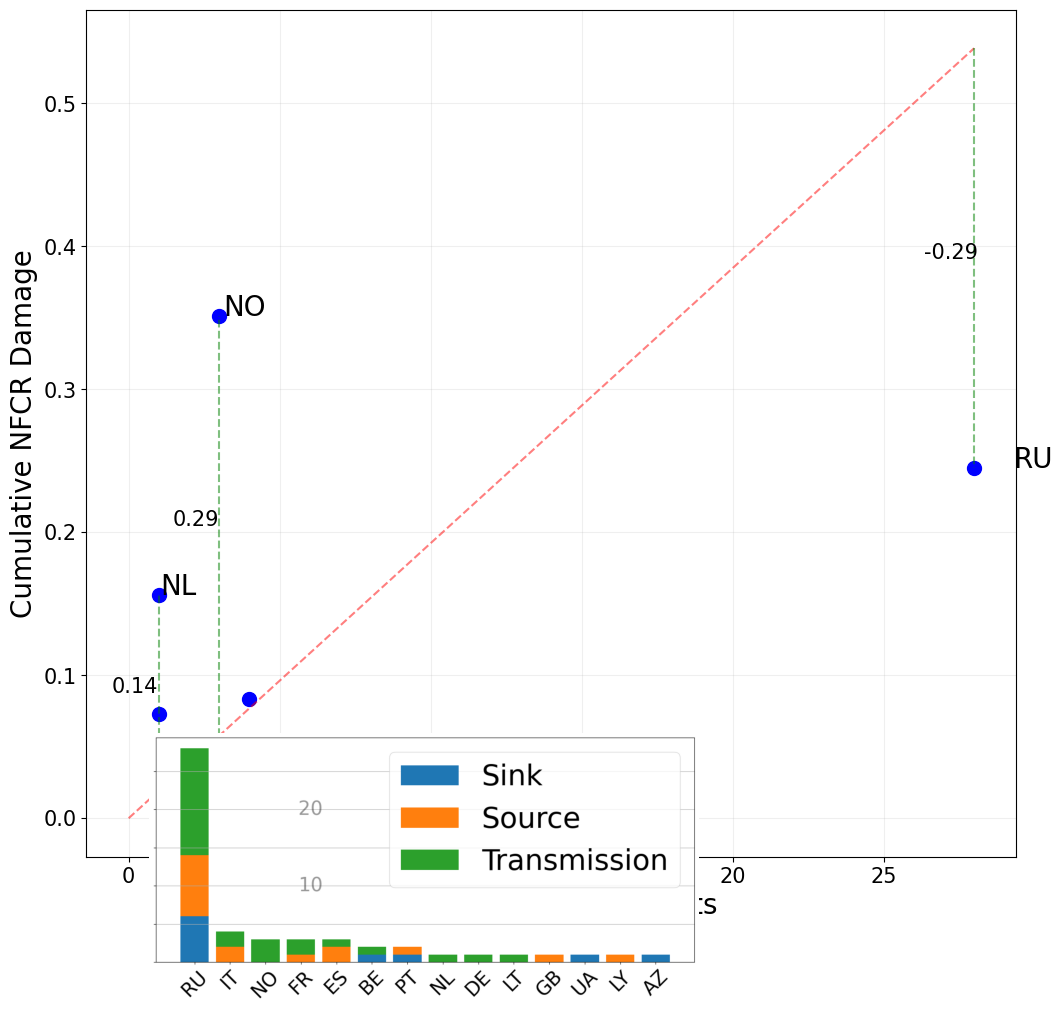

In [44]:
aggregated_data = results_df.groupby('CC').agg({'removed_entity': 'count', 'diff': 'sum'}).reset_index()
metric = 'NCPI' if analysis == 'centrality' else 'NFCR'
aggregated_data.columns = ['CC', 'Component_Count', 'Cumulative_' + metric + '_Damage']     


# plt.figure(figsize=(12, 10))
plt.figure(figsize=(12, 11))
plt.scatter(aggregated_data['Component_Count'], aggregated_data['Cumulative_' + metric + '_Damage'], s=100, c='blue')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Cumulative '+metric+' Damage', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.2)


# Add a label and an arrow to the point for the top 3 countries with the highest cumulative NPI damage
top_3 = aggregated_data.nlargest(3, 'Cumulative_' + metric + '_Damage')
for i, row in top_3.iterrows():
    plt.annotate(row['CC'], (row['Component_Count'], row['Cumulative_' + metric + '_Damage']), fontsize=20, textcoords='offset points')

  
slope = 1 / aggregated_data['Component_Count'].sum()

# Extend the line to the end of the plot
max_x = aggregated_data['Component_Count'].max()
max_y = slope * max_x
plt.plot([0, max_x], [0, max_y], 'r--', alpha=0.5, label='Regression Line')

for i, row in top_3.iterrows():
    x, y1, y2 = row['Component_Count'], row['Component_Count'] * slope, row['Cumulative_' + metric + '_Damage']
    
    # Plot the dashed line
    plt.plot([x, x], [y1, y2], 'g--', alpha=0.5)

    plt.annotate(round(row['Cumulative_' + metric + '_Damage'] - row['Component_Count'] * slope, 2), 
                 (x, (y1 + y2) / 2), 
                 textcoords="offset points", 
                 xytext=(-17,0), 
                 ha='center', 
                 fontsize=15)

if analysis == 'max_flow':
    
    ins_pos = (1080, 530) if analysis == 'max_flow' else (720, 1000) # .png
    ins_pos = (770, 390) # .svg


    ins = inset_axes(plt.gca(), width=5.5, height=5.5, bbox_to_anchor=ins_pos)
    img = mpimg.imread('saved_plots/specific/helpers/'+analysis+'_country_edge_aggr.png')
    ins.imshow(img)
    ins.axis('off')

# plt.savefig('saved_plots/specific/'+analysis+'_cum_damage_versus_num_edge.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('latex_figures/'+analysis+'_cum_damage_versus_num_edge.svg', bbox_inches='tight', pad_inches=0.1)

plt.show()

# Comparison of Physical Properties

In [ ]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'


In [ ]:

centr_results_df = pd.read_pickle('results/centrality/iggielgn/greedy_edge_removal.pkl')
centr_results_df['diff'] = round(centr_results_df['NPI'].diff() * (-1), 5)
centr_results_df = centr_results_df.iloc[1:101]
centr_results_df['removed_entity'] = centr_results_df['removed_entity'].apply(lambda edge: tuple(edge))
centr_results_df.NPI = round(centr_results_df.NPI, 3)
centr_results_df.connectedness = round(centr_results_df.connectedness, 3)
centr_results_df.reach = round(centr_results_df.reach, 3)
centr_results_df.connectivity = round(centr_results_df.connectivity, 3)
centr_results_df['CC'] = None
centr_results_df['diameter'] = None
centr_results_df['length'] = None
centr_results_df['capacity'] = None
centr_results_df = centr_results_df[['removed_entity', 'CC', 'diameter', 'length', 'capacity', 'NPI', 'connectedness', 'reach', 'connectivity', 'diff']]


maxflow_results_df = pd.read_pickle('results/max_flow/iggielgn/hybrid/wfcr_edge_removal_df.pkl')
maxflow_results_df['diff'] = round(maxflow_results_df['capacity_robustness_max_flow'].diff() * (-1), 5)
maxflow_results_df.capacity_robustness_max_flow = round(maxflow_results_df.capacity_robustness_max_flow, 3)
maxflow_results_df['CC'] = None
maxflow_results_df['diameter'] = None
maxflow_results_df['length'] = None
maxflow_results_df['capacity'] = None
maxflow_results_df = maxflow_results_df[['removed_entity', 'CC', 'diameter', 'length', 'capacity', 'capacity_robustness_max_flow', 'diff']].iloc[1:]
maxflow_results_df['removed_entity'] = maxflow_results_df['removed_entity'].apply(lambda edge: tuple(edge))


In [ ]:
# Iterate through all edges in results_df, and if not present in G_simple_directed, reverse the edge
for results_df in [centr_results_df, maxflow_results_df]:
    for i in range(1, len(results_df)+1):
        if results_df['removed_entity'][i] not in G_simple_directed.edges():
            results_df['removed_entity'][i] = (results_df['removed_entity'][i][1], results_df['removed_entity'][i][0])
    # Ignore SettingWithCopyWarning
    pd.options.mode.chained_assignment = None

C:\Users\Oskar\AppData\Local\Temp\ipykernel_20504\360031724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['removed_entity'][i] = (results_df['removed_entity'][i][1], results_df['removed_entity'][i][0])
C:\Users\Oskar\AppData\Local\Temp\ipykernel_20504\360031724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['removed_entity'][i] = (results_df['removed_entity'][i][1], results_df['removed_entity'][i][0])
C:\Users\Oskar\AppData\Local\Temp\ipykernel_20504\360031724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [ ]:
for results_df in [centr_results_df, maxflow_results_df]:
    for edge in G_simple_directed.edges(data=True):
        diameter_mm = edge[2]['diameter_mm']
        length_km = edge[2]['length_km']
        max_cap_M_m3_per_d = edge[2]['max_cap_M_m3_per_d']
        from_country_code = edge[2]['from_country_code']

        edge_data = [diameter_mm, length_km, max_cap_M_m3_per_d]

        results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'CC'] = [from_country_code]
        results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'diameter'] = [diameter_mm]
        results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'length'] = [length_km]
        results_df.loc[results_df['removed_entity'] == (edge[0], edge[1]), 'capacity'] = [max_cap_M_m3_per_d]

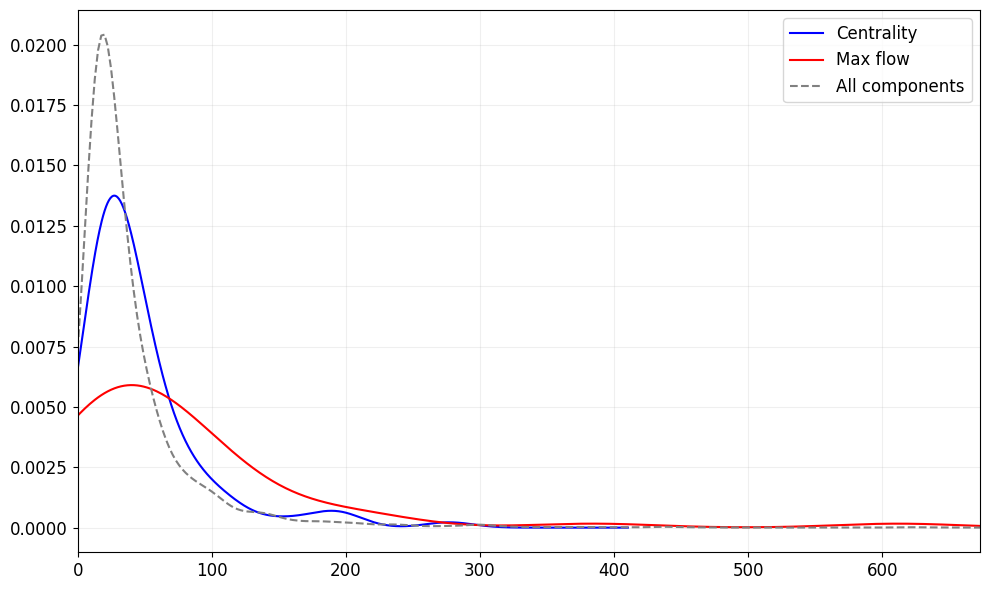

Length statistics:
Centrality - Median: 30.756650999999998 Std Dev: 45.56045185643375
Max flow - Median: 45.325533 Std Dev: 102.8452471932369
All components - Median: 25.48822 Std Dev: 54.6086689085583


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting for length
fig, ax_length = plt.subplots(figsize=(10, 6))

# Plot the length
centr_results_df['length'].plot.kde(ax=ax_length, label='Centrality', color='blue')
maxflow_results_df['length'].plot.kde(ax=ax_length, label='Max flow', color='red')

# Also plot the same curve for all edges in G_simple_directed
G_simple_directed_edges = G_simple_directed.edges(data=True)
lengths = [edge[2]['length_km'] for edge in G_simple_directed_edges]
pd.Series(lengths).plot.kde(ax=ax_length, label='All components', color='gray', linestyle='--')

# Set labels and title
ax_length.legend(fontsize='large')

# Set x-axis limit to the length of the longest df
ax_length.set_xlim(left=0, right=maxflow_results_df['length'].max() * 1.1)

# Increase tick fontsize
ax_length.tick_params(axis='both', which='major', labelsize='large')

# Remove the label for the y axis
ax_length.set_ylabel('')

plt.grid(True, alpha=0.2)
plt.tight_layout()
fig.savefig('saved_plots/iggielgn/hybrid/comparison/edge_length_comparison.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Print the mean and standard deviation for length
print("Length statistics:")
print("Centrality - Median:", centr_results_df['length'].median(), "Std Dev:", centr_results_df['length'].std())
print("Max flow - Median:", maxflow_results_df['length'].median(), "Std Dev:", maxflow_results_df['length'].std())
print("All components - Median:", pd.Series(lengths).median(), "Std Dev:", pd.Series(lengths).std())


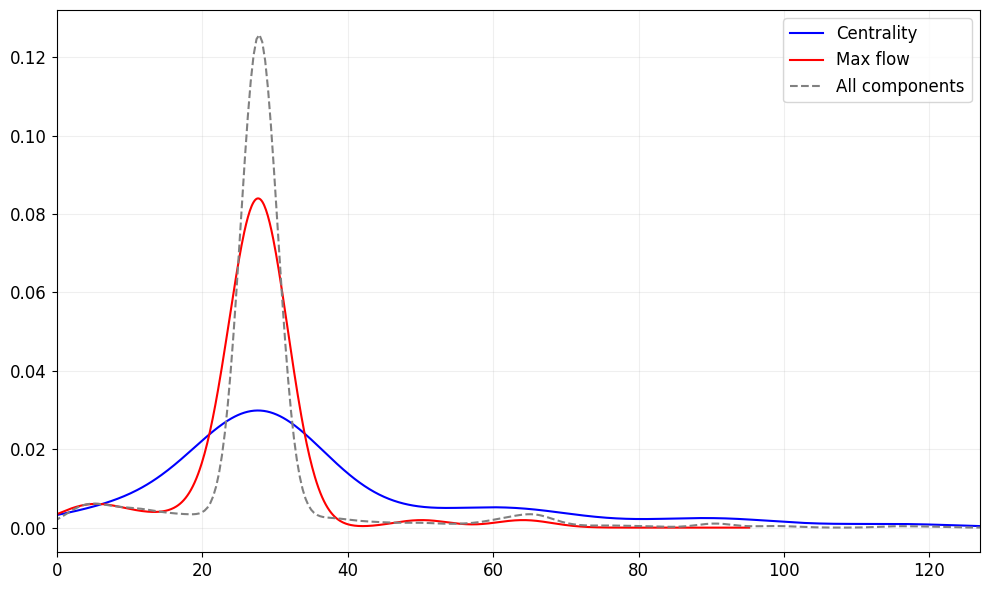

Capacity statistics:
Centrality - Median: 27.809143341935314 Std Dev: 22.325483920766562
Max flow - Median: 27.809143341935314 Std Dev: 8.823315155794475
All components - Median: 29.291633887760344 Std Dev: 14.47417358881075


In [ ]:

# Plotting for capacity
fig, ax_capacity = plt.subplots(figsize=(10, 6))

# Plot the capacity
centr_results_df['capacity'].plot.kde(ax=ax_capacity, label='Centrality', color='blue')
maxflow_results_df['capacity'].plot.kde(ax=ax_capacity, label='Max flow', color='red')

# Also plot the same curve for all edges in G_simple_directed
capacities = [edge[2]['max_cap_M_m3_per_d'] for edge in G_simple_directed_edges]
pd.Series(capacities).plot.kde(ax=ax_capacity, label='All components', color='gray', linestyle='--')

# Set labels and title
ax_capacity.legend(fontsize='large')

# Set x-axis limit to exclude negative values
ax_capacity.set_xlim(left=0, right=centr_results_df['capacity'].max() * 1.1)

# Increase tick fontsize
ax_capacity.tick_params(axis='both', which='major', labelsize='large')

# Remove the label for the y axis
ax_capacity.set_ylabel('')
plt.grid(True, alpha=0.2)
plt.tight_layout()
fig.savefig('saved_plots/iggielgn/hybrid/comparison/edge_capacity_comparison.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Print the mean and standard deviation for capacity
print("Capacity statistics:")
print("Centrality - Median:", centr_results_df['capacity'].median(), "Std Dev:", centr_results_df['capacity'].std())
print("Max flow - Median:", maxflow_results_df['capacity'].median(), "Std Dev:", maxflow_results_df['capacity'].std())
print("All components - Median:", pd.Series(capacities).mean(), "Std Dev:", pd.Series(capacities).std())